In [19]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv

In [20]:
load_dotenv()

True

In [22]:
# define the model
model = ChatGoogleGenerativeAI(
    temperature=0.7,
    model="gemini-2.5-flash"
)

In [23]:
class BlogState(TypedDict):
    """State structure for blog generation"""
    title: str
    outline: List[str]
    content: List[str]

In [24]:
def create_outline(state: BlogState) -> BlogState:
    """Create a blog outline from the title."""
    title = state['title']
    prompt = f'Write a detailed outline for a blog post titled: "{title}"'
    outline = model.invoke(prompt).content
    state['outline'] = outline
    print(f"Outline created: {outline}")
    return state

In [25]:
def create_content(state: BlogState) -> BlogState:
    """Create blog content from the outline on a title"""
    title = state['title']
    outline = state['outline']
    prompt = f'Write a detailed blog post titled "{title}" based on the following outline:\n{outline}'
    content = model.invoke(prompt).content
    state['content'] = content
    return state

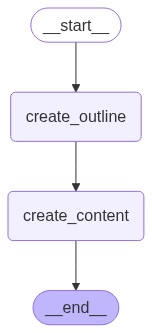

In [26]:
graph = StateGraph(BlogState)

# add the nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_content', create_content)

# define the edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_content')
graph.add_edge('create_content', END)

app = graph.compile()
app

In [27]:
res = app.invoke({'title': 'The Future of AI in Everyday Life'})
print(res)

Outline created: Here's a detailed outline for a blog post titled "The Future of AI in Everyday Life," designed to be engaging, informative, and thought-provoking.

---

## Blog Post Outline: The Future of AI in Everyday Life

**Blog Post Title:** The Future of AI in Everyday Life: How Intelligent Systems Will Reshape Our World

**Target Audience:** General readers interested in technology, future trends, and societal impact; non-technical audience.

**Tone:** Optimistic yet realistic, informative, slightly awe-inspiring, with a touch of caution regarding challenges.

**Word Count Goal:** 1500-2000 words (this outline is designed for a comprehensive post)

---

### I. Introduction (Approx. 150-200 words)

*   **A. Catchy Hook:** Start with a relatable scenario – "Remember when voice assistants felt like sci-fi? Now they're in our kitchens." Or "AI isn't just for labs and supercomputers anymore; it's quietly weaving itself into the fabric of our daily existence."
*   **B. Brief Context/

In [28]:
print(res['content'])

## The Future of AI in Everyday Life: How Intelligent Systems Will Reshape Our World

Remember when voice assistants felt like something out of a sci-fi movie? Now, asking Alexa to play music or Google to set a timer is as commonplace as boiling water. AI isn't just for research labs and supercomputers anymore; it's quietly weaving itself into the very fabric of our daily existence. From the streaming recommendations that know your taste better than you do, to the smart home devices managing your environment, and the GPS navigating your commutes, AI is already an invisible, yet indispensable, part of our lives.

But this is merely the prologue. The future of AI in everyday life isn't just about added convenience; it's about a profound, often invisible, transformation of how we live, work, learn, and interact with the world. This evolution promises to bring both incredible opportunities and significant challenges, pushing the boundaries of what we thought possible. In this post, we'll j